# Principal Component Analysis (PCA) using Single Value Decomposition (SVD)

### Algorithm:
1. Change the basis of the vectors so that they are brought close to origin. Mathematically, we use ***mean of give vectors*** for this purpose.

2. We find the covarinace matrix of the vectors. This is needed to understand the right fit of principal component line. ***The greater the varinace of the respective data points, it is understood that the line fits well.***

3. We find the Eigenvalue and hence Eigenvector. Eigen Values and Eigen Vectors give the projection of the data points on PCA scale. ***Eigen Vectors give the relationship between the principal component line and attributes in the dataset (eg., height, weight, gene).*** This propotions to attributes is called leading scores.

4. Component lines with higher leading scores are retained there by reducing data loss.


Theory: https://www.youtube.com/watch?v=FgakZw6K1QQ



In [ ]:
import numpy as np

class PCA:

  '''Number of componentst the High Dimension Data has to be reduced to'''
  def __init__(self, n_components):
    self.n=n_components
    self.components=None

  '''Perform PCA on train data'''
  def fit(self, x):
    '''Get the mean of the vector space'''
    self.mean=np.mean(x, axis=0)
    x=x-self.mean

    '''Get the covariance matrix'''
    cov=np.cov(x.T)

    '''Get the Eigen values and vectors of the Covarinace Matrix:'''
    eigVec, eigVal = np.linalg.eig(cov)
    eigVec=eigVec.T

    '''Sort the Eigen Vectors:
    This is nessacry as we chose only those Principal Componets which have high varinace'''
    idxs=np.argsort(eigVal)[::-1]
    eigVal=eigVal[idxs]
    eigVec=eigVec[idxs]

    self.components=eigVec[:self.n]
    return eigVec

  def transform(self, x):
    x=x-self.mean
    return np.dot(x, (self.components).T)


In [ ]:
from sklearn import datasets
data=datasets.load_iris()

x=data.data
y=data.target

pca=PCA(2)
principal_components=pca.fit(x)
post_pca_x=pca.transform(x)

print(f"Shape of X (Data Points) is: ",x.shape )
print(f"Shape of X after PCA is: ",post_pca_x.shape)

Shape of X (Data Points) is:  (150, 4)
Shape of X after PCA is:  (150, 2)


In [ ]:
print(f"This represents the principal components (Eigen Vectors): ",principal_components)

This represents the principal components (Eigen Vectors):  [[0.24267075 4.22824171 0.0782095  0.02383509]
 [0.02383509 0.0782095  0.24267075 4.22824171]
 [0.24267075 0.02383509 4.22824171 0.0782095 ]
 [0.24267075 0.0782095  0.02383509 4.22824171]]


<ipython-input-33-1d35f3c38f24>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(post_pca_x[:,0],post_pca_x[:,1], c=y, alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))


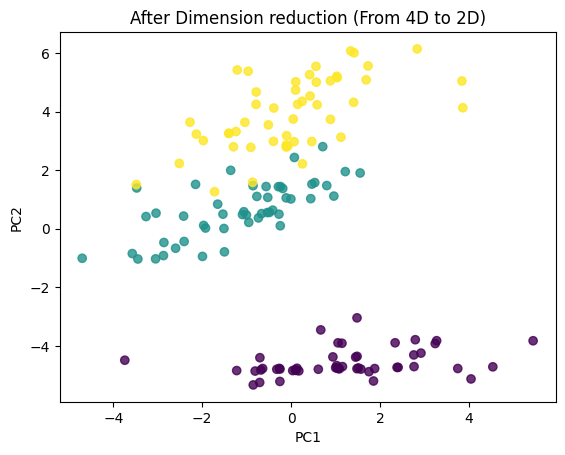

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(post_pca_x[:,0],post_pca_x[:,1], c=y, alpha=0.8, cmap=plt.cm.get_cmap("viridis",3))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("After Dimension reduction (From 4D to 2D)")
plt.show()